In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [4]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


# Applying ANOVA test to find the best features

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [7]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [4]:
x=df[['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']]

In [5]:
y=df['Cover_Type']

In [6]:
anova_scores, _ = f_classif(x, y)

C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [21 29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [7]:
from sklearn.feature_selection import VarianceThreshold


In [8]:
# Remove features with zero variance
constant_filter = VarianceThreshold(threshold=0)  # Threshold 0 removes constant features
X_filtered = constant_filter.fit_transform(x)

In [9]:
anova_scores, _ = f_classif(X_filtered, y)


In [10]:
print("ANOVA F-scores:\n", anova_scores)

ANOVA F-scores:
 [1.82784839e+02 1.62412333e+04 4.82973750e+01 3.01849051e+02
 3.75897228e+02 7.47361332e+01 1.22307046e+03 3.78220751e+02
 1.17983196e+02 1.97802459e+02 7.46124576e+02 9.28831132e+02
 1.67668321e+02 4.44959975e+02 5.07249791e+03 8.69410921e+01
 1.45220461e+02 9.29217593e+02 2.48325587e+02 4.13813573e+01
 1.66973792e+02 1.00000000e+00 7.92643368e+00 9.77737621e+02
 5.32492573e+01 1.93312894e+02 1.97416602e+02 9.92883070e+01
 1.55081162e+01 2.04175621e+02 3.31681108e+01 1.06153059e+01
 2.86957446e+01 9.03767442e+00 2.33563396e+02 1.94900394e+02
 6.36016884e+01 1.00000000e+00 1.69621555e+01 3.96387866e+00
 4.34137664e+00 3.41825668e+02 3.52446574e+02 5.50679713e+01
 1.22048655e+02 7.22167680e+01 5.89840867e+00 9.71607722e+01
 6.28354697e+00 3.45277516e+01 7.44906554e+02 6.40529899e+02
 4.22043458e+02]


In [11]:
fs=SelectKBest(score_func=f_classif, k=15)

In [18]:
fs

SelectKBest(k=15)

In [12]:
x_selected = fs.fit_transform(X_filtered, y)

In [12]:
fs.get_support(True)

array([ 1,  4,  6,  7, 10, 11, 13, 14, 17, 23, 41, 42, 50, 51, 52])

In [ ]:
'Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type3','Soil_Type9','Soil_Type27','Soil_Type28','Soil_Type36', 'Soil_Type37','Soil_Type38'

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [23]:
X_filtered.shape  

(15120, 53)

In [25]:
y.shape

(15120,)

In [13]:
x_data=df[['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type3','Soil_Type9','Soil_Type27','Soil_Type28','Soil_Type36', 'Soil_Type37','Soil_Type38']]

# Splitting the data into train and test

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

In [16]:
sc=StandardScaler()

In [17]:
x_train= sc.fit_transform(x_train)

In [18]:
x_test = sc.fit_transform(x_test)

# Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc=DecisionTreeClassifier()

In [21]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred=dtc.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
a1=accuracy_score(y_test, y_pred)
c1=classification_report(y_test, y_pred)
m1=confusion_matrix(y_test, y_pred)

In [45]:
print("Accuracy Score is :\n ", a1)
print("\n")
print("Classification Report is :\n", c1)
print("\n")
print("Confusion Matrix is :\n", m1)

Accuracy Score is :
  0.7443783068783069


Classification Report is :
               precision    recall  f1-score   support

           1       0.61      0.68      0.65       421
           2       0.62      0.55      0.58       438
           3       0.65      0.71      0.68       428
           4       0.91      0.86      0.88       449
           5       0.82      0.84      0.83       416
           6       0.72      0.70      0.71       432
           7       0.90      0.86      0.88       440

    accuracy                           0.74      3024
   macro avg       0.75      0.74      0.74      3024
weighted avg       0.75      0.74      0.75      3024



Confusion Matrix is :
 [[287  84   0   0  11   2  37]
 [115 243  15   0  48  11   6]
 [  1  12 303  22   8  82   0]
 [  0   0  50 386   0  13   0]
 [ 10  35  11   0 349  11   0]
 [  1  12  90  17   8 304   0]
 [ 53   8   0   0   0   0 379]]


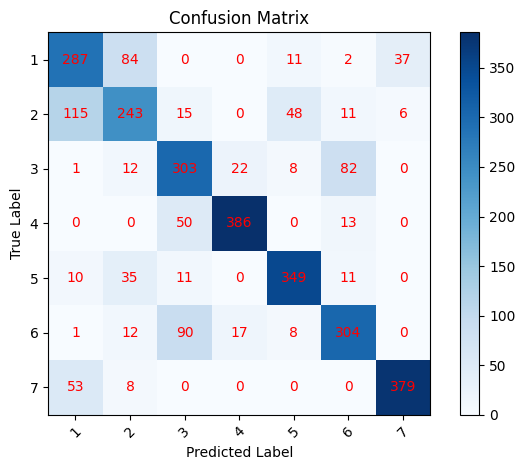

In [26]:
plt.imshow(m1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['1', '2','3','4','5','6','7']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m1.shape[0]):
    for j in range(m1.shape[1]):
        plt.text(j, i, format(m1[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Hyper Parameter Tuning of Decision Tree Classifier

In [21]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters = {
    'max_features': ['log2', 'sqrt', 'auto'],  # Valid values for max_features
    'criterion': ['entropy', 'gini'],         # Options for splitting criteria
    'max_depth': [2, 3, 5, 10, 50],           # Maximum depth of the tree
    'min_samples_split': [2, 3, 50, 100],     # Minimum samples required to split
    'min_samples_leaf': [1, 5, 8, 10]         # Minimum samples at a leaf node (fixed)
}

In [29]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dtc, param_grid=parameters, cv=5, scoring='accuracy', verbose=1)

In [30]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-pack

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10, 50],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 10],
                         'min_samples_split': [2, 3, 50, 100]},
             scoring='accuracy', verbose=1)

In [31]:
dtc=grid_search.best_estimator_

In [32]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=50, max_features='log2')

In [33]:
y_pred=dtc.predict(x_test)

In [34]:
a2=accuracy_score(y_test, y_pred)
c2=classification_report(y_test, y_pred)
m2=confusion_matrix(y_test, y_pred)

In [44]:
print("Accuracy Score is : \n", a2)
print("\n")
print("Classification Report is :\n", c2)
print("\n")
print("Confusion Matrix is :\n", m2)

Accuracy Score is : 
 0.7222222222222222


Classification Report is :
               precision    recall  f1-score   support

           1       0.61      0.65      0.63       421
           2       0.57      0.56      0.57       438
           3       0.65      0.67      0.66       428
           4       0.88      0.86      0.87       449
           5       0.77      0.77      0.77       416
           6       0.71      0.68      0.69       432
           7       0.87      0.85      0.86       440

    accuracy                           0.72      3024
   macro avg       0.72      0.72      0.72      3024
weighted avg       0.72      0.72      0.72      3024



Confusion Matrix is :
 [[274  96   1   0  12   1  37]
 [104 247  17   0  48  12  10]
 [  3  13 286  33  13  77   3]
 [  0   0  40 387   0  22   0]
 [ 14  44  23   0 321  10   4]
 [  7  22  73  22  13 294   1]
 [ 44  11   2   0   8   0 375]]


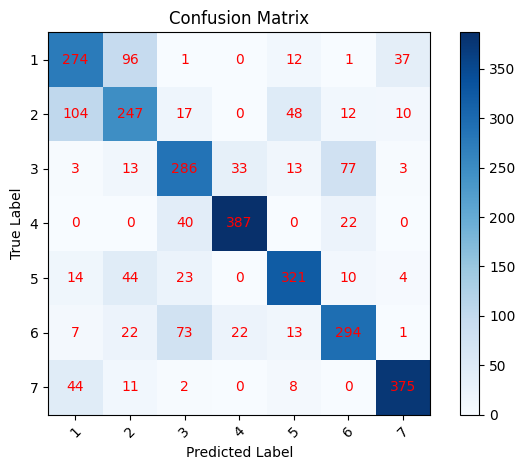

In [36]:
plt.imshow(m2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['1', '2','3','4','5','6','7']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m2.shape[0]):
    for j in range(m2.shape[1]):
        plt.text(j, i, format(m2[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Random Tree Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc =RandomForestClassifier(n_estimators=1000)

In [39]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [40]:
y_pred= rfc.predict(x_test)

In [41]:
a3=accuracy_score(y_test, y_pred)
c3=classification_report(y_test, y_pred)
m3=confusion_matrix(y_test, y_pred)

In [43]:
print("Accuracy Score is :\n ", a3)
print("\n")
print("Classification Report is :\n", c3)
print("\n")
print("Confusion Matrix is :\n", m3)

Accuracy Score is :
  0.8488756613756614


Classification Report is :
               precision    recall  f1-score   support

           1       0.78      0.79      0.78       421
           2       0.80      0.68      0.73       438
           3       0.78      0.78      0.78       428
           4       0.93      0.95      0.94       449
           5       0.87      0.94      0.90       416
           6       0.82      0.85      0.83       432
           7       0.95      0.96      0.95       440

    accuracy                           0.85      3024
   macro avg       0.85      0.85      0.85      3024
weighted avg       0.85      0.85      0.85      3024



Confusion Matrix is :
 [[331  56   0   0  11   0  23]
 [ 81 296  16   0  37   7   1]
 [  0   2 334  21   3  68   0]
 [  0   0  19 425   0   5   0]
 [  1  10  12   0 390   3   0]
 [  0   4  45   9   7 367   0]
 [ 14   2   0   0   0   0 424]]


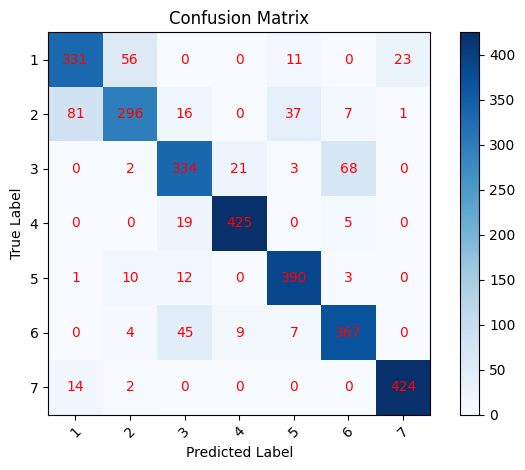

In [46]:
plt.imshow(m3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['1', '2','3','4','5','6','7']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m3.shape[0]):
    for j in range(m3.shape[1]):
        plt.text(j, i, format(m3[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Hyper Parameter Tuning for Random Forest Classifier 

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [22]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [23]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=1)

In [ ]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

# Applying PCA on the data

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=10)

In [49]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [50]:
rfc.fit(x_train_pca, y_train)

RandomForestClassifier(n_estimators=1000)

In [51]:
y_pred= rfc.predict(x_test_pca)

In [52]:
a4=accuracy_score(y_test, y_pred)
c4=classification_report(y_test, y_pred)
m4=confusion_matrix(y_test, y_pred)

In [54]:
print("Accuracy Score is :\n ", a4)
print("\n")
print("Classification Report is :\n", c4)
print("\n")
print("Confusion Matrix is :\n", m4)

Accuracy Score is :
  0.7423941798941799


Classification Report is :
               precision    recall  f1-score   support

           1       0.67      0.68      0.67       421
           2       0.67      0.50      0.57       438
           3       0.68      0.62      0.65       428
           4       0.88      0.90      0.89       449
           5       0.70      0.86      0.77       416
           6       0.70      0.73      0.72       432
           7       0.87      0.90      0.88       440

    accuracy                           0.74      3024
   macro avg       0.74      0.74      0.74      3024
weighted avg       0.74      0.74      0.74      3024



Confusion Matrix is :
 [[286  63   0   0  26   2  44]
 [104 220  14   0  74  11  15]
 [  0   5 267  35  25  96   0]
 [  0   0  28 404   0  17   0]
 [  9  25  14   0 357  11   0]
 [  0   5  69  18  23 317   0]
 [ 30  11   1   0   4   0 394]]


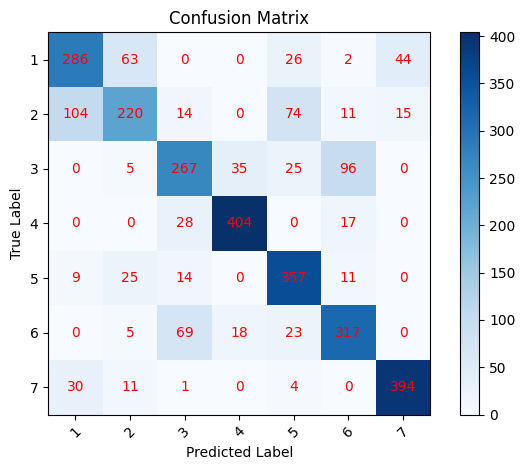

In [55]:
plt.imshow(m4, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['1', '2','3','4','5','6','7']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m4.shape[0]):
    for j in range(m4.shape[1]):
        plt.text(j, i, format(m4[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [98]:
df["Cover_Type"].value_counts()

Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64

In [101]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

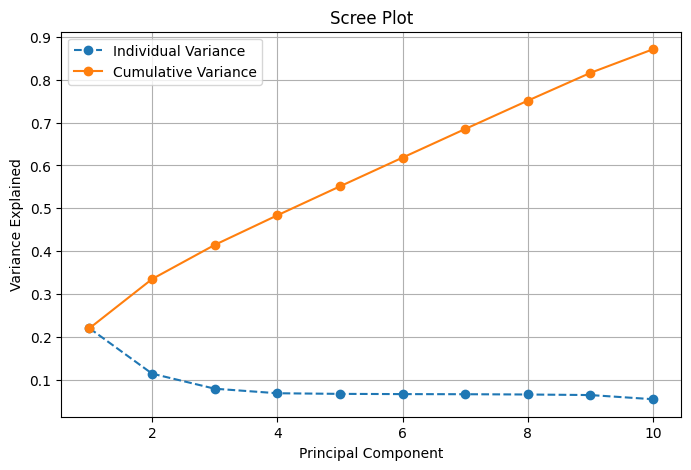

In [102]:
# Plot the scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', label='Cumulative Variance')

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend(loc='best')
plt.grid()
plt.show()

In [95]:
import seaborn as sns

C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_5548\3595176826.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=df, palette='Set2')


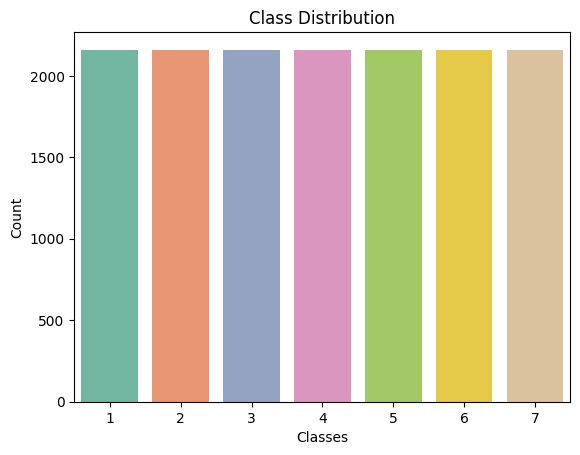

In [97]:
sns.countplot(x='Cover_Type', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

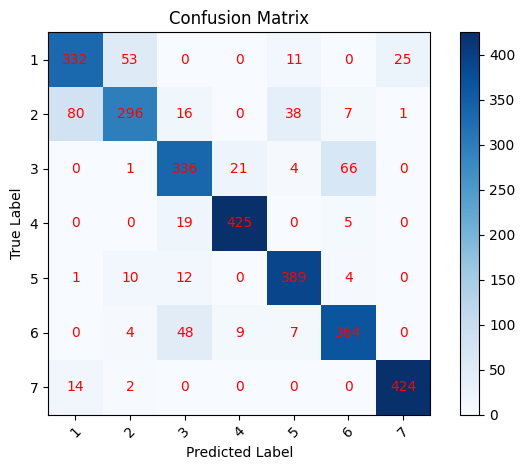

In [100]:
plt.imshow(m3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['1', '2','3','4','5','6','7']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m3.shape[0]):
    for j in range(m3.shape[1]):
        plt.text(j, i, format(m3[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()